#### Eleonora Bellasio (15650A)
# <span style="color:orangered">Laboratorio di Simulazione Numerica: Esercitazione 6

### <span style="color:royalblue">Esercizio 06.1

Si rappresento le grandezze
1. $U(N,T) = \langle H \rangle_{h=0}$
2. $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$ 
3. $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$
4. $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$

come funzione di $T$ nel range $\left[0.5;2.0\right]$ per un sistema di $N=50$ spins con $J=1$. 

Viene applicato il metodo del data blocking per ottenere la media di ogni blocco, la media complessiva e l'incertezza statistica.
Nello stesso grafico si confronta il risultato ottenuto utilizzando l'algoritmo di Metropolis con quello ottenuto dall'algoritmo di Gibbs. Si rappresenta anche, per un ulteriore confronto, il risultato con la curva esatta ricavata dal calcolo analitico.

#### <span style="color:deeppink">Energia Interna

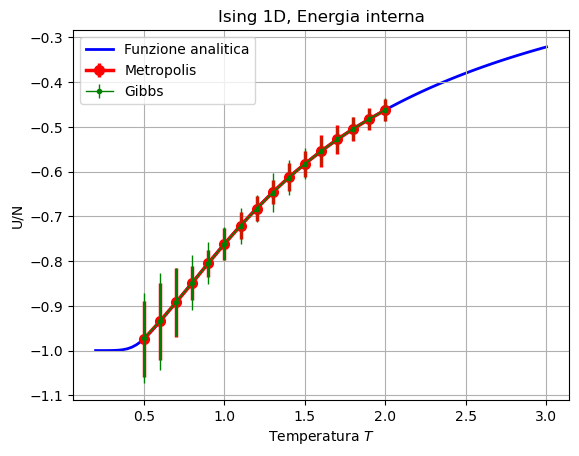

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import os,sys
import pandas as pd

dinp = "06.1/OUTPUT_FINALI/"
finp1 = dinp + "total_energy_metropolis.dat"
finp2 = dinp + "total_energy_gibbs.dat"

if not os.path.isfile(finp1):
    sys.exit( "file does not exist: " + finp1 )

if not os.path.isfile(finp2):
    sys.exit( "file does not exist: " + finp2 )

#Metto i dati di output in un dataframe
#Indico che il separatore di campo non è la virgola (default) ma una serie di spazi
#Consodeo tutte le righe che iniziano con # come commenti, qundi non entrano nel dataframe
#Siccome ho eliminato l'intestazione ricreo l'header con name=[...]
df_metro = pd.read_csv(finp1, sep='\\s+', comment='#', names=['BLOCK:','TE:','AVE_TE:','ERROR:','TEMPERATURE:'])
df_gibbs = pd.read_csv(finp2, sep='\\s+', comment='#', names=['BLOCK:','TE:','AVE_TE:','ERROR:','TEMPERATURE:'])
#Seleziono i dati del 20-esimo blocco per ogni temperatura da inserire nel grafico
df_block20_metro = df_metro[df_metro['BLOCK:'] == 20]
df_block20_gibbs = df_gibbs[df_gibbs['BLOCK:'] == 20]

# Funzione analitica
points=100
T = np.linspace(0.2,3.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )

#Plotto i dati dagli argoritmi di Metropolis e Gibbs e la funzione analitica
#zorder ordina i piani dei plot, quella con lo zorder più alto sta sopra
plt.errorbar(df_block20_metro['TEMPERATURE:'], df_block20_metro['AVE_TE:'], yerr=df_block20_metro['ERROR:']*100,
                         label='Metropolis', marker= 'o', color='red', zorder=2, markersize=7, linewidth=2.5) 
plt.errorbar(df_block20_gibbs['TEMPERATURE:'], df_block20_gibbs['AVE_TE:'], yerr=df_block20_gibbs['ERROR:']*100, 
                         label='Gibbs', marker= '.', color='green', zorder=3, markersize=6, linewidth=1)
plt.plot(T, e, label='Funzione analitica', color='blue', zorder=1, linewidth=2)
#plt.plot(x, y_fit, color='coral', marker='o', linestyle='none', linewidth=2, markersize=2, zorder=1) 
plt.xlabel(r'Temperatura $T$')
plt.ylabel('U/N')
plt.title("Ising 1D, Energia interna")
plt.grid(True)
plt.legend()
plt.show()


#### <span style="color:deeppink">Calore Specifico

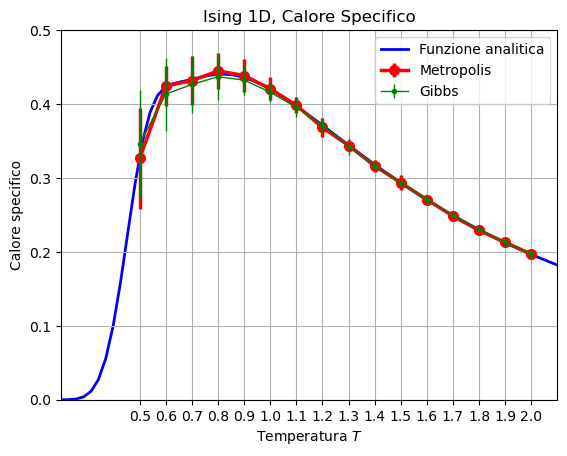

In [3]:
dinp = "06.1/OUTPUT_FINALI/"
finp3 = dinp + "specific_heat_metropolis.dat"
finp4 = dinp + "specific_heat_gibbs.dat"

if not os.path.isfile(finp3):
    sys.exit( "file does not exist: " + finp3 )

if not os.path.isfile(finp4):
    sys.exit( "file does not exist: " + finp4 )

#Metto i dati di output in un dataframe
#Indico che il separatore di campo non è la virgola (default) ma una serie di spazi
#Consodeo tutte le righe che iniziano con # come commenti, qundi non entrano nel dataframe
#Siccome ho eliminato l'intestazione ricreo l'header con name=[...]
df_metro = pd.read_csv(finp3, sep='\\s+', comment='#', names=['BLOCK:','SH:','AVE_SH:','ERROR:','TEMPERATURE:'])
df_gibbs = pd.read_csv(finp4, sep='\\s+', comment='#', names=['BLOCK:','SH:','AVE_SH:','ERROR:','TEMPERATURE:'])
#Seleziono i dati del 20-esimo blocco per ogni temperatura da inserire nel grafico
df_block20_metro = df_metro[df_metro['BLOCK:'] == 20]
df_block20_gibbs = df_gibbs[df_gibbs['BLOCK:'] == 20]

#Funzione analitica
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)

#Metropolis, Gibbs e funzione analitica
plt.errorbar(df_block20_metro['TEMPERATURE:'], df_block20_metro['AVE_SH:'], yerr=df_block20_metro['ERROR:']*10,
                         label='Metropolis', marker= 'o', color='red', zorder=2, markersize=7, linewidth=2.5)
plt.errorbar(df_block20_gibbs['TEMPERATURE:'], df_block20_gibbs['AVE_SH:'], yerr=df_block20_gibbs['ERROR:']*10,
                         label='Gibbs', marker= '.', color='green', zorder=3, markersize=6, linewidth=1)
plt.plot(T, heat, label='Funzione analitica', color='blue', zorder=1, linewidth=2)
plt.xlabel(r'Temperatura $T$')
plt.xlim([0.2,2.1])
plt.ylim([0.0,0.5])
plt.xticks(df_block20_metro['TEMPERATURE:'])
plt.ylabel('Calore specifico')
plt.title("Ising 1D, Calore Specifico")
plt.grid(True)
plt.legend()
plt.show()

#### <span style="color:deeppink">Magnetizzazione

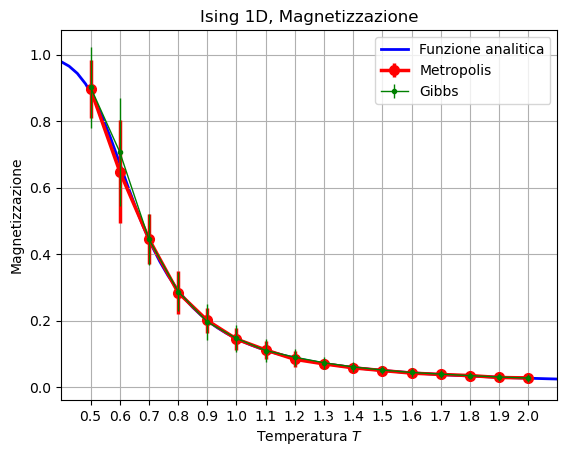

In [5]:
dinp = "06.1/OUTPUT_FINALI/"
finp5 = dinp + "magnetization_metropolis.dat"
finp6 = dinp + "magnetization_gibbs.dat"

if not os.path.isfile(finp5):
    sys.exit( "file does not exist: " + finp5 )

if not os.path.isfile(finp6):
    sys.exit( "file does not exist: " + finp6 )

#Metto i dati di output in un dataframe
#Indico che il separatore di campo non è la virgola (default) ma una serie di spazi
#Consodeo tutte le righe che iniziano con # come commenti, qundi non entrano nel dataframe
#Siccome ho eliminato l'intestazione ricreo l'header con name=[...]
df_metro = pd.read_csv(finp5, sep='\\s+', comment='#', names=['BLOCK:','MAG:','AVE_MAG:','ERROR:','TEMPERATURE:'])
df_gibbs = pd.read_csv(finp6, sep='\\s+', comment='#', names=['BLOCK:','MAG:','AVE_MAG:','ERROR:','TEMPERATURE:'])
#Seleziono i dati del 20-esimo blocco per ogni temperatura da inserire nel grafico
df_block20_metro = df_metro[df_metro['BLOCK:'] == 20]
df_block20_gibbs = df_gibbs[df_gibbs['BLOCK:'] == 20]

# Funzione analitica
h=0.02 #external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)

#Metropolis, Gibbs e funzione analitica
plt.errorbar(df_block20_metro['TEMPERATURE:'],df_block20_metro['AVE_MAG:'],yerr=df_block20_metro['ERROR:']*10, 
                         label='Metropolis',  marker= 'o', color='red', zorder=2, markersize=7, linewidth=2.5)
plt.errorbar(df_block20_gibbs['TEMPERATURE:'],df_block20_gibbs['AVE_MAG:'],yerr=df_block20_gibbs['ERROR:']*10,
                         label='Gibbs', marker= '.', color='green', zorder=3, markersize=6, linewidth=1)
plt.plot(T, M, label='Funzione analitica', color='blue', zorder=1, linewidth=2)
plt.xlabel(r'Temperatura $T$')
plt.xlim([0.4,2.1])
plt.xticks(df_block20_metro['TEMPERATURE:'])
plt.ylabel('Magnetizzazione')
plt.title("Ising 1D, Magnetizzazione")
plt.legend()
plt.grid(True)
plt.show()

#### <span style="color:deeppink">Suscettività

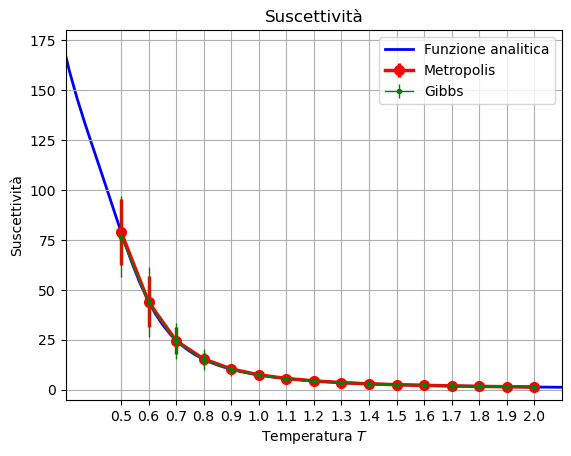

In [7]:
dinp = "06.1/OUTPUT_FINALI/"
finp7 = dinp + "susceptibility_metropolis.dat"
finp8 = dinp + "susceptibility_gibbs.dat"

if not os.path.isfile(finp7):
    sys.exit( "file does not exist: " + finp7 )

if not os.path.isfile(finp8):
    sys.exit( "file does not exist: " + finp8 )

#Metto i dati di output in un dataframe
#Indico che il separatore di campo non è la virgola (default) ma una serie di spazi
#Consodeo tutte le righe che iniziano con # come commenti, qundi non entrano nel dataframe
#Siccome ho eliminato l'intestazione ricreo l'header con name=[...]
df_metro = pd.read_csv(finp7, sep='\\s+', comment='#', names=['BLOCK:','CHI:','AVE_CHI:','ERROR:','TEMPERATURE:'])
df_gibbs = pd.read_csv(finp8, sep='\\s+', comment='#', names=['BLOCK:','CHI:','AVE_CHI:','ERROR:','TEMPERATURE:'])
#Seleziono i dati del 20-esimo blocco per ogni temperatura da inserire nel grafico
df_block20_metro = df_metro[df_metro['BLOCK:'] == 20]
df_block20_gibbs = df_gibbs[df_gibbs['BLOCK:'] == 20]

# Funzione analitica
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)

#Metropolis, Gibbs e funzione analitica
plt.errorbar(df_block20_metro['TEMPERATURE:'],df_block20_metro['AVE_CHI:'],yerr=df_block20_metro['ERROR:']*20,
                         label='Metropolis',  marker= 'o', color='red', zorder=2, markersize=7, linewidth=2.5)
plt.errorbar(df_block20_gibbs['TEMPERATURE:'],df_block20_gibbs['AVE_CHI:'],yerr=df_block20_gibbs['ERROR:']*20,
                         label='Gibbs', marker= '.', color='green', zorder=3, markersize=6, linewidth=1)
plt.plot(T, X, label='Funzione analitica', color='blue', zorder=1, linewidth=2)
plt.xlabel(r'Temperatura $T$')
plt.xlim([0.3,2.1])
plt.ylim([-5, 180])
plt.xticks(df_block20_metro['TEMPERATURE:'])
plt.ylabel('Suscettività')
plt.title("Suscettività")
plt.legend()
plt.grid(True)
plt.show()